<a href="https://colab.research.google.com/github/36ruSer/-/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%BF%D0%BE_%D0%BF%D1%80%D0%BE%D1%84%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%C2%AB%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA_%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%C2%BB_DAU_PROD_72.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дипломная работа по теме:
«Анализ оттока клиентов банка (поиск инсайтов, составление рекомендаций стейкхолдерам)»

Введение.

Цели проекта:

  Исследовать влияние возраста и количества используемых продуктов на отток клиентов.
  Оценить взаимосвязь между наличием кредитной карты и вероятностью оттока.
Разработать на основе проведенного анализа практические рекомендации для повышения уровня удержания клиентов банка.

Бизнес-Задачи:

  Выявление факторов, влияющих на отток. Определить, существует ли статистически значимая связь между: возрастом клиентов и использованием одного или двух продуктов банка, наличием кредитной карты и фактом оттока клиента.
  Оценка различий между группами клиентов. Сравнить средние значения ключевых показателей (например, возраст, баланс, кредитный рейтинг) между: клиентами, использующими один и два продукта, ушедшими и оставшимися клиентами.
  Формирование рекомендаций по удержанию. На основе выявленных закономерностей и различий между группами клиентов разработать конкретные и применимые рекомендации для банка с целью снижения оттока клиентов и повышения их лояльности.


In [ ]:
# Подключение библиотек
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats

In [ ]:
# Загрузка данных
df = pd.read_csv('Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
# Получение информации о датасете (количество строк, столбцов, типы данных)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Описание полей датасета:

RowNumber – Индекс строки (порядковый номер записи).

CustomerId – Уникальный идентификатор клиента.

Surname – Фамилия клиента.

CreditScore – Кредитный рейтинг клиента.

Geography – Страна, в которой проживает клиент.

Gender – Пол клиента.

Age – Возраст клиента.

Tenure – Количество лет, в течение которых клиент является клиентом банка.

Balance – Сумма средств на счете клиента.

NumOfProducts – Количество банковских продуктов, используемых клиентом.

HasCrCard – Наличие кредитной карты (1 - да, 0 - нет).

IsActiveMember – Является ли клиент активным членом банка (1 - да, 0 - нет).

EstimatedSalary – Предполагаемая зарплата клиента.

Exited – Целевая переменная. Показывает, ушел ли клиент из банка (1 - да, 0 - нет).

Complain – Были ли жалобы от клиента (1 - да, 0 - нет).

Satisfaction Score – Оценка удовлетворенности клиента.

Card Type – Тип карты клиента.

Point Earned – Количество бонусных баллов, заработанных клиентом.

In [ ]:
# Проверка на наличие пропусков
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# Проверка на дубликаты
duplicates = df.duplicated().sum()
print(f'Количество дубликатов: {duplicates}')

Количество дубликатов: 0


In [ ]:
# Описание статистических характеристик числовых признаков
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Выводы о начальном состоянии данных.

Общие сведения: Датасет содержит 10000 записей и 18 столбцов.

Типы данных:

Числовые:
RowNumber, CustomerId, CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Complain, Satisfaction Score, Point Earned.

Категориальные: Surname, Geography, Gender, Card Type.

Пропуски данных: Нет пропущенных значений, все столбцы заполнены.

Статистика:
    Средний CreditScore: 650.53 (диапазон: 350–850).
    Средний возраст: 38.92 года (от 18 до 92 лет).
    Средний стаж: 5 лет (от 0 до 10 лет).
    Разнообразие в балансе: от 0 до высоких значений.
    В среднем, клиенты имеют 5 продуктов.
    Exited: показывает, покинули ли клиенты банк.
    Квартильные значения: 25% клиентов имеют CreditScore ниже 584, а 75% — выше 718. Это помогает выявить разные группы клиентов.

In [ ]:
# создадим список с названиями графиков
titles_num = ['Баллы кредитного скоринга', \
                  'Возраст клиентов', \
                  'Баланс на счёте', \
                  'Заработная плата клиентов']

In [ ]:
#Определим список признаков для построения гистограмм и boxplot
selected_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

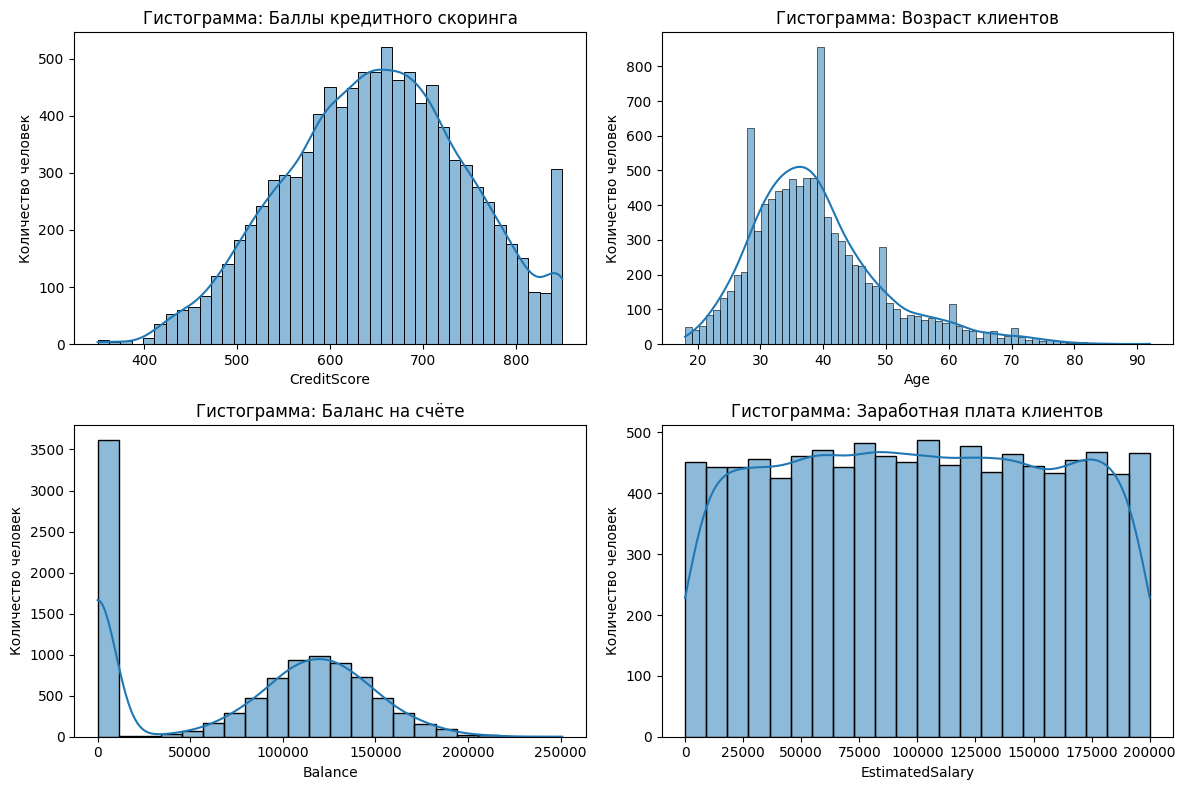

In [ ]:
# Задаем размеры фигуры для графиков
plt.figure(figsize=(12, 8))

# Создаем подграфики и строим гистограммы для каждого признака
for i, feature in enumerate(selected_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Гистограмма: {titles_num[i]}')
    plt.xlabel(feature)
    plt.ylabel('Количество человек')
plt.tight_layout()
plt.show()

Анализ гистограмм показал следующее: кредитный рейтинг близок к нормальному распределению с небольшим пиком, возраст имеет правостороннюю асимметрию, баланс имеет два пика (около нуля и в диапазоне 100000–150000), а заработная плата распределена относительно равномерно.

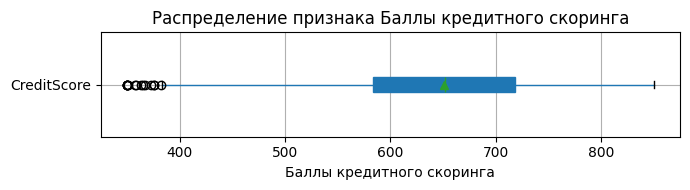

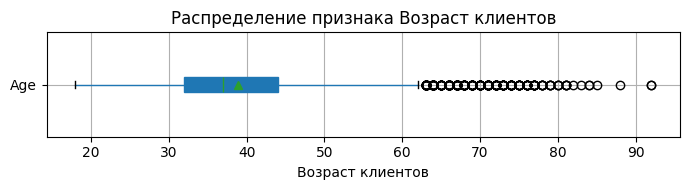

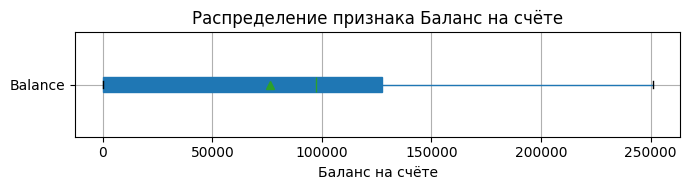

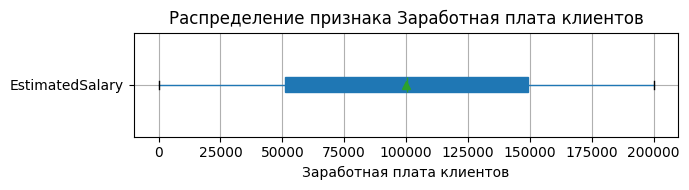

In [ ]:
# Строим boxplot для каждого признака
for i in range(len(selected_features)):
    plt.figure(figsize=(7, 2))
    df.boxplot(selected_features[i], patch_artist=True, vert=False, showmeans=True )
    plt.title(f"Распределение признака {titles_num[i]}")
    plt.xlabel(titles_num[i])
    plt.tight_layout()
    plt.show();

Выявлены аномалии. Посмотрим перцентели по столбцам Age, CreditScore

In [ ]:
# Список столбцов для анализа
columns_to_analyze = ['Age', 'CreditScore']

# Вычисление и вывод перцентилей
for column in columns_to_analyze:
    print(f"Перцентили для столбца {column}:")
    percentiles = np.percentile(df[column], [5, 95])
    print(f"  5-й перцентиль: {percentiles[0]}")
    print(f"  95-й перцентиль: {percentiles[1]}")
    print("-" * 30)

Перцентили для столбца Age:
  5-й перцентиль: 25.0
  95-й перцентиль: 60.0
------------------------------
Перцентили для столбца CreditScore:
  5-й перцентиль: 489.0
  95-й перцентиль: 812.0
------------------------------


Для дальнейшего анализа нам следует убрать из исследования данные очень пожилых клиентов, клиентов с низким показателем кредитного скорринга

In [ ]:
# Фильтрация данных.
max_age = 60  # Верхняя граница возраста (клиенты старше не включаются в анализ). Обоснование: исключение клиентов пенсионного возраста, которые могут иметь другие паттерны поведения.
min_credit_score = 489  # Нижняя граница кредитного рейтинга (клиенты с рейтингом ниже не включаются). Обоснование: фокусировка на клиентах с определенным уровнем кредитоспособности.

# Фильтрация данных
df_filtered = df[(df['Age'] <= max_age) & (df['CreditScore'] >= min_credit_score)].copy()

# Анализ удаленных строк
print("\nКоличество удаленных строк:", len(df) - len(df_filtered))
print("Процент удаленных строк:",
      (len(df) - len(df_filtered)) / len(df) * 100,
      "%" )


Количество удаленных строк: 939
Процент удаленных строк: 9.39 %


Для категориальных переменных построем столбчатую диаграмму

In [ ]:
# Создадим список с категориальными переменными
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score', 'Card Type']

# Создание заголовков для графиков
titles_cat = {
    'Geography': 'Страна',
    'Gender': 'Пол',
    'HasCrCard': 'Есть кредитная карта',
    'IsActiveMember': 'Активный участник',
    'Complain': 'Жалоба',
    'Satisfaction Score': 'Оценка удовлетворенности',
    'Card Type': 'Тип карты'
}

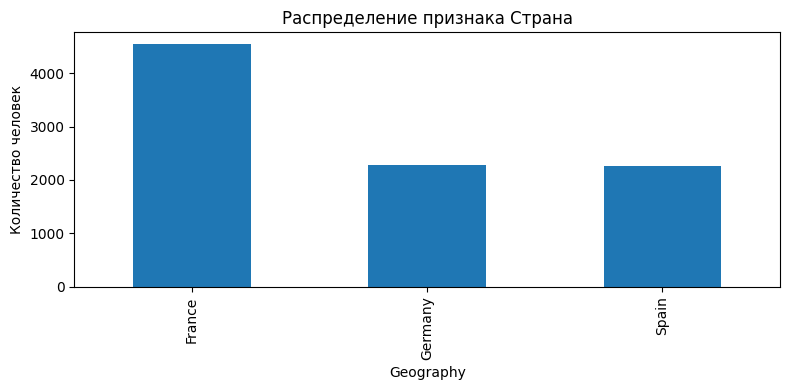

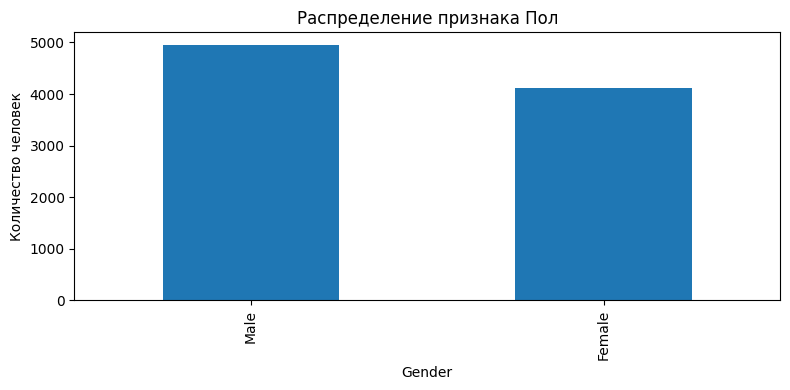

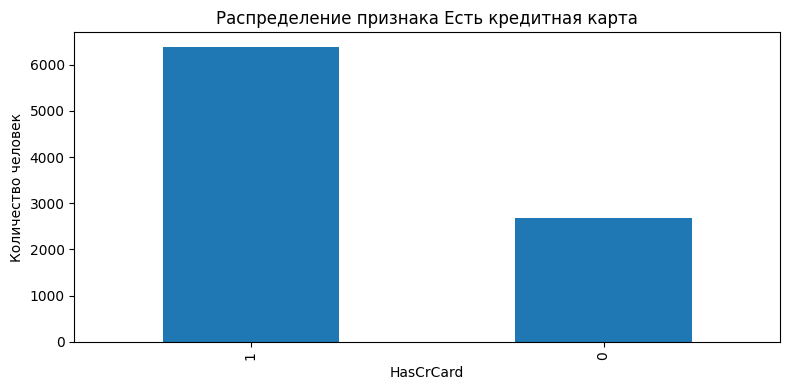

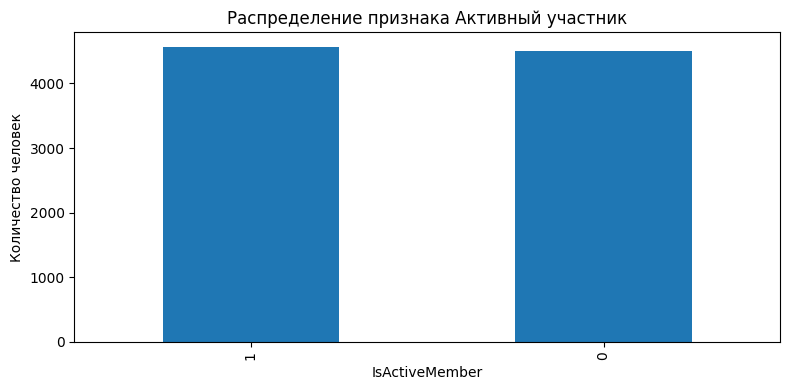

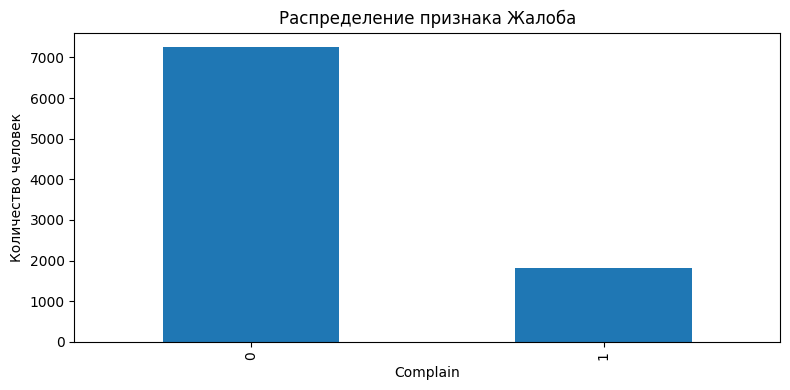

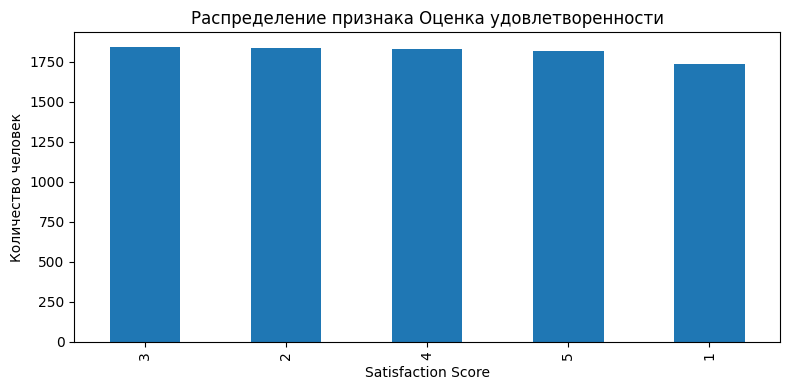

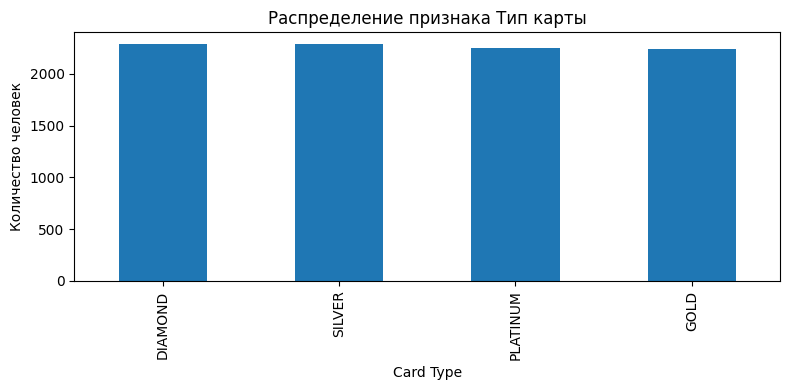

In [ ]:
# Построение графиков
for i in range(len(categorical_features)):
    feature = categorical_features[i]
    title = titles_cat.get(feature, feature)  # Получаем заголовок

    plt.figure(figsize=(8, 4))
    ax = df_filtered[feature].value_counts().plot.bar()  # Сохраняем объект Axes
    plt.title(f"Распределение признака {title}")
    plt.ylabel("Количество человек")
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

Из графиков категориальных переменных можно проследить следующие:

Почти половина клиентов проживает в France. Остальные поровну поделены между Germany и Spain.
Мужчин больше, чем женщин почти на 1000 человек.
Почти 7000 клиентов имеют кредитную карту. Распределение по признаку Тип карты и Оценка удовлетворенности равномерное. Активных и не активных участников считай поровну.

Корреляционный анализ

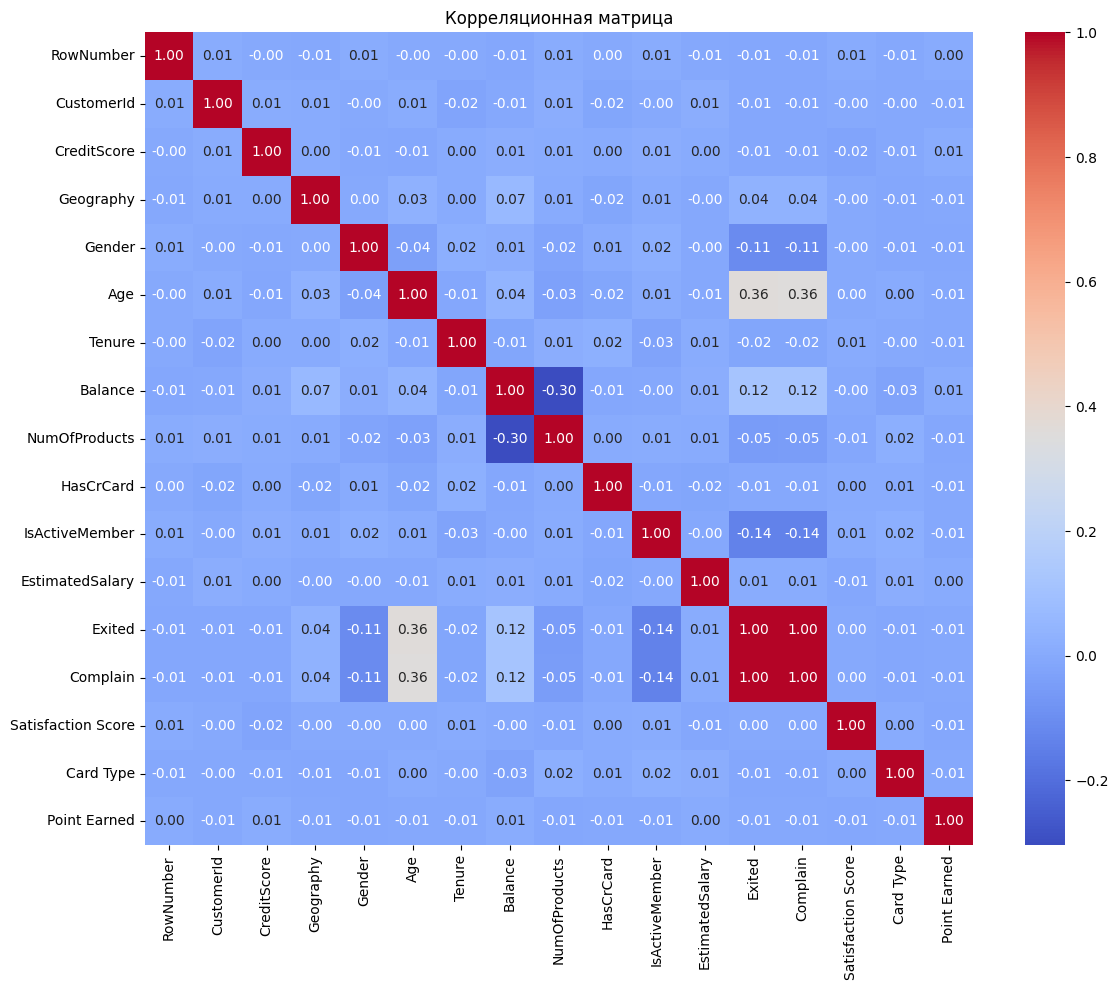

In [ ]:
# Преобразование категориальных переменных с помощью LabelEncoder
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df_filtered[feature] = le.fit_transform(df_filtered[feature])
    label_encoders[feature] = le

    # Выбор числовых столбцов для корреляционного анализа
numerical_df = df_filtered.select_dtypes(include=np.number) # выбираем только числовые столбцы

# Вычисление корреляционной матрицы
correlation_matrix = numerical_df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.tight_layout()
plt.show()

Сильно коррелирующие признаки отсутствуют. Не высокая взаимосвязь наблюдается между оттоком и возрастом (0,36). IsActiveMember и Exited (-0,14): слабая отрицательная корреляция. Говорит о том, что активные клиенты менее склонны к оттоку.Balance и NumOfProducts (-0,30): умеренная отрицательная корреляция.Говорит о том, что чем больше баланс на счете клиента, тем меньше вероятность, что он будет использовать много продуктов.

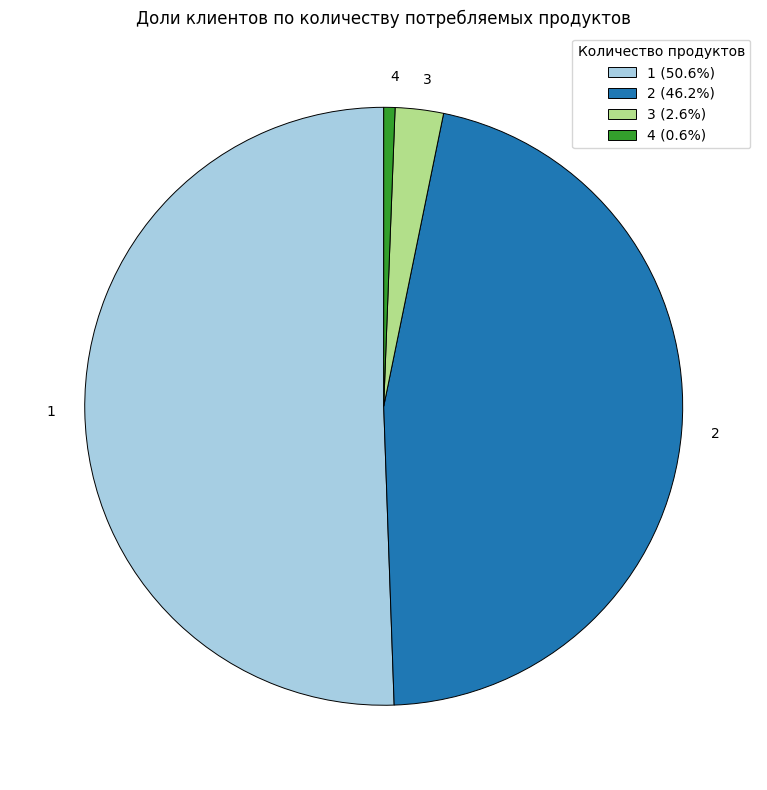

In [ ]:

# Подсчет количества клиентов для каждого количества продуктов
product_counts = df_filtered['NumOfProducts'].value_counts().sort_index()

# Расчет долей клиентов для каждого количества продуктов
product_shares = product_counts / len(df_filtered)

# Создание круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(product_shares, labels=product_shares.index, startangle=90,
        colors=plt.cm.Paired.colors,
        wedgeprops={'linewidth': 0.7, 'edgecolor': 'black'})
plt.title('Доли клиентов по количеству потребляемых продуктов')
plt.legend(title="Количество продуктов", loc="best", labels=[f"{i} ({p:.1%})" for i, p in product_shares.items()])  # Легенда с долями
plt.tight_layout()
plt.show()

Почти все клиенты имеют 1 или 2 продукта, 2.66% - пользуютя 3 продуктами и лишь 0.60% - 4-мя.




In [ ]:
# посчитаем долю ушедших от числа клиентов в каждой группе по  количеству потребляемых продуктов
tr = df_filtered.groupby('NumOfProducts')\
    .agg({'CustomerId': 'count', 'Exited': 'mean'})\
    .sort_values(by='Exited', ascending=False)\
    .rename(columns={'CustomerId': 'Кол-во клиентов', 'Exited': 'Доля ушедших клиентов'})\
    .style.format({'Доля ушедших клиентов': '{:.2%}'})
display(tr)

,Кол-во клиентов,Доля ушедших клиентов
NumOfProducts,,
4,55,100.00%
3,236,82.63%
1,4581,27.37%
2,4189,7.23%


Клиенты, имеющие 4 продукта банка все ушли в отток, c 3-мя продуктами на 82.63%, в оттоке и с 1 продуктом на 27.37%. клиенты с 2 продуктами на 7.23%

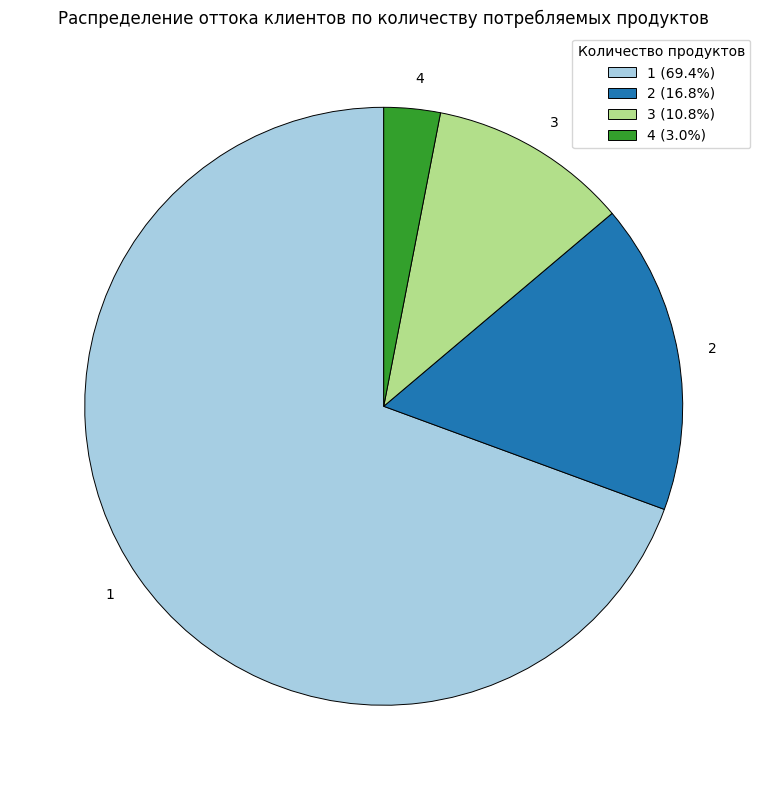

In [ ]:
# Группировка по NumOfProducts и Exited, подсчет количества
churn_by_product = df_filtered.groupby(['NumOfProducts', 'Exited']).size().unstack(fill_value=0)

# Рассчитываем общий отток для каждого количества продуктов
total_churn_by_product = churn_by_product[1]

# Создаем круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(total_churn_by_product, labels=total_churn_by_product.index, startangle=90,
        colors=plt.cm.Paired.colors, wedgeprops={'linewidth': 0.7, 'edgecolor': 'black'})

plt.title('Распределение оттока клиентов по количеству потребляемых продуктов')

# Добавляем легенду с долями (как обсуждали ранее)
plt.legend(title="Количество продуктов", loc="best",
           labels=[f"{i} ({p:.1%})" for i, p in (total_churn_by_product / total_churn_by_product.sum()).items()])

plt.tight_layout()
plt.show()

От общего числа ушедших клиентов лидирует группа с 1 продуктом, далее отток пропорционален количеству клиентов в каждой группе оттока.

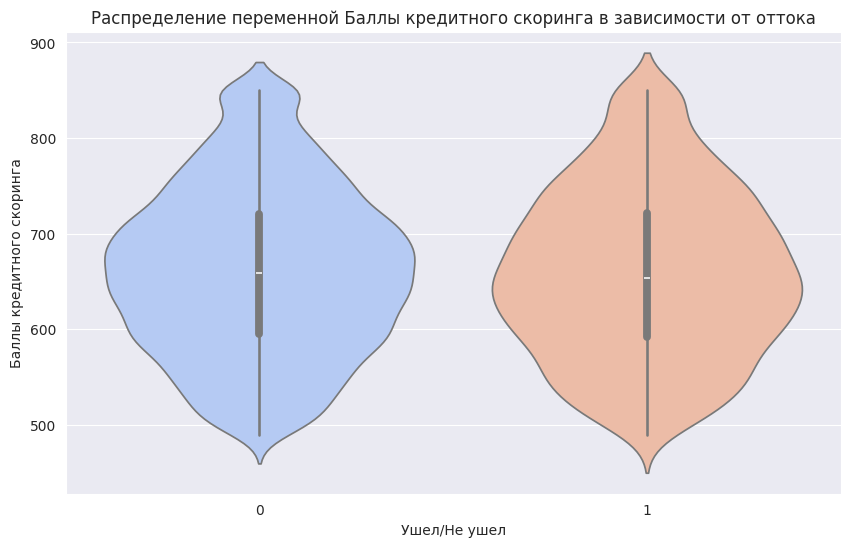

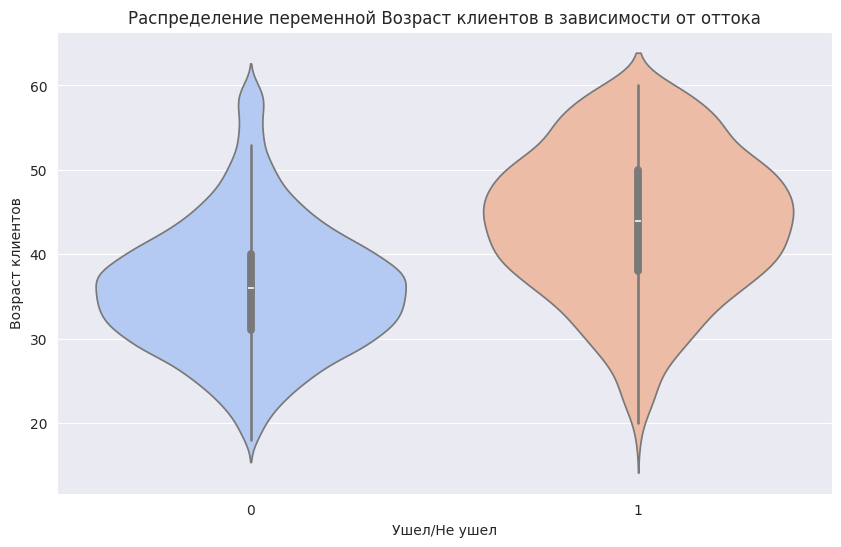

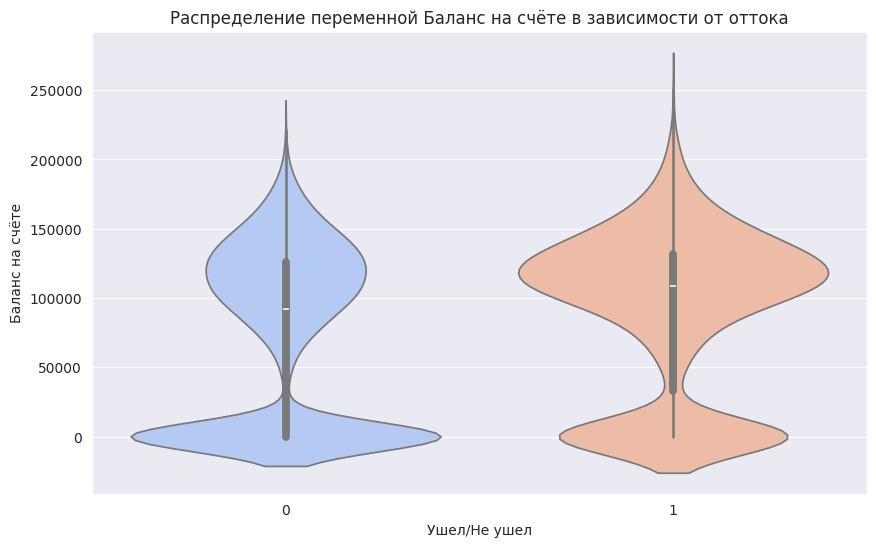

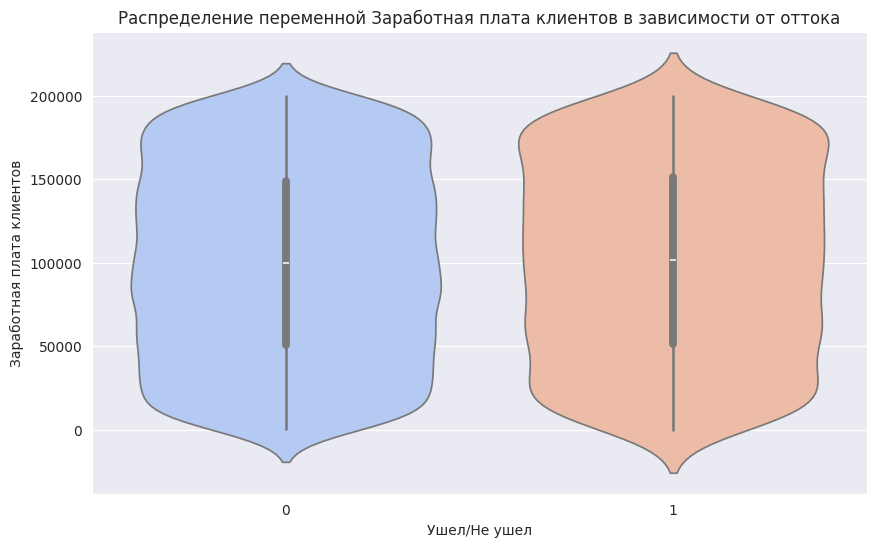

In [ ]:
# Установка стиля seaborn
sns.set_style("darkgrid")

# Определение числовых столбцов
num_col = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Определение названий для числовых столбцов
titles_num = ['Баллы кредитного скоринга', 'Возраст клиентов', 'Баланс на счёте', 'Заработная плата клиентов']

# Создание категориального столбца оттока
df_filtered["churn_cat"] = df_filtered["Exited"].astype("category")

# Создание скрипичных графиков
for i in range(len(num_col)):
    plt.figure(figsize=(10,6))
    sns.violinplot(x="churn_cat", y=df_filtered[num_col[i]], data=df_filtered, hue="churn_cat", palette="coolwarm", legend=False)
    plt.title(f"Распределение переменной {titles_num[i]} в зависимости от оттока")
    plt.xlabel("Ушел/Не ушел")
    plt.ylabel(titles_num[i])
    plt.show()

Распределение возраста ушедших клиентов смещено вправо по сравнению с оставшимися, это говорит о том, что более пожилые клиенты чаще уходят.Клиенты без баланса (возможно, неактивные) чаще остаются, чем клиенты с ненулевым балансом.

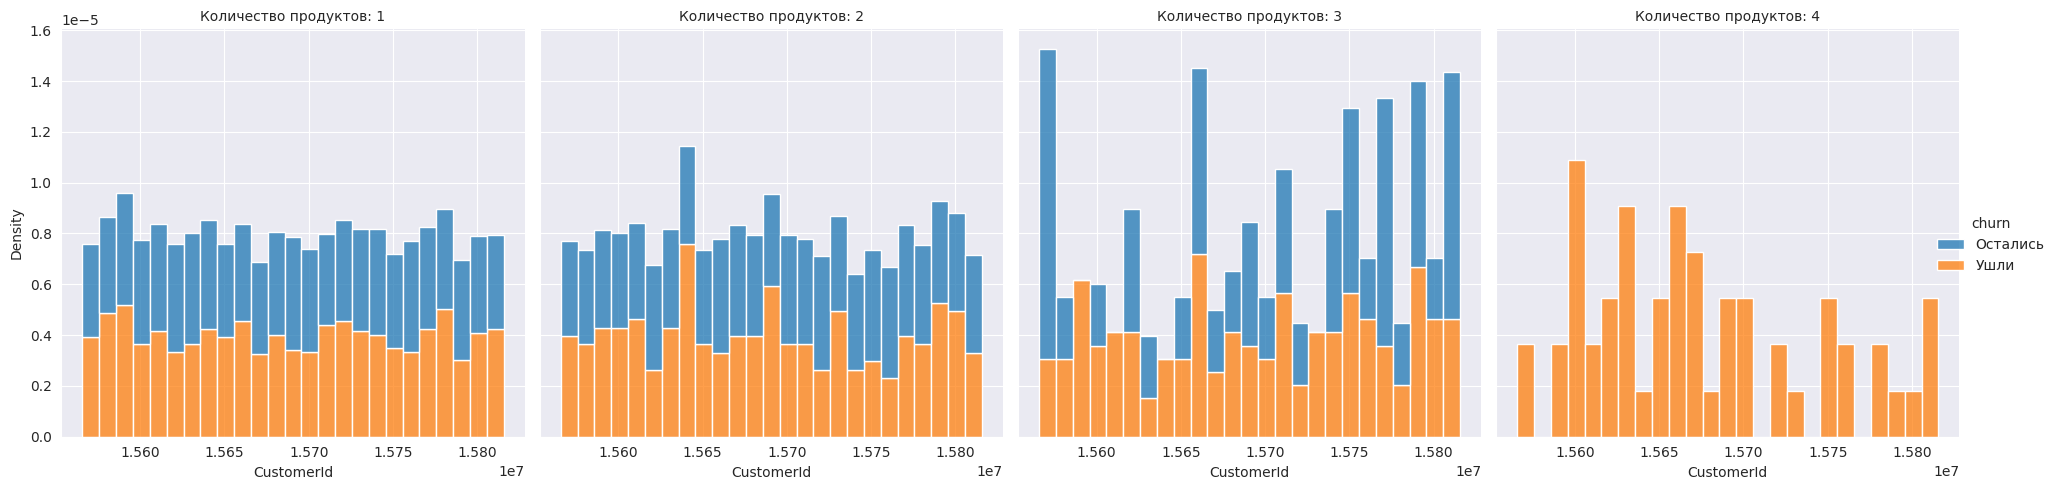

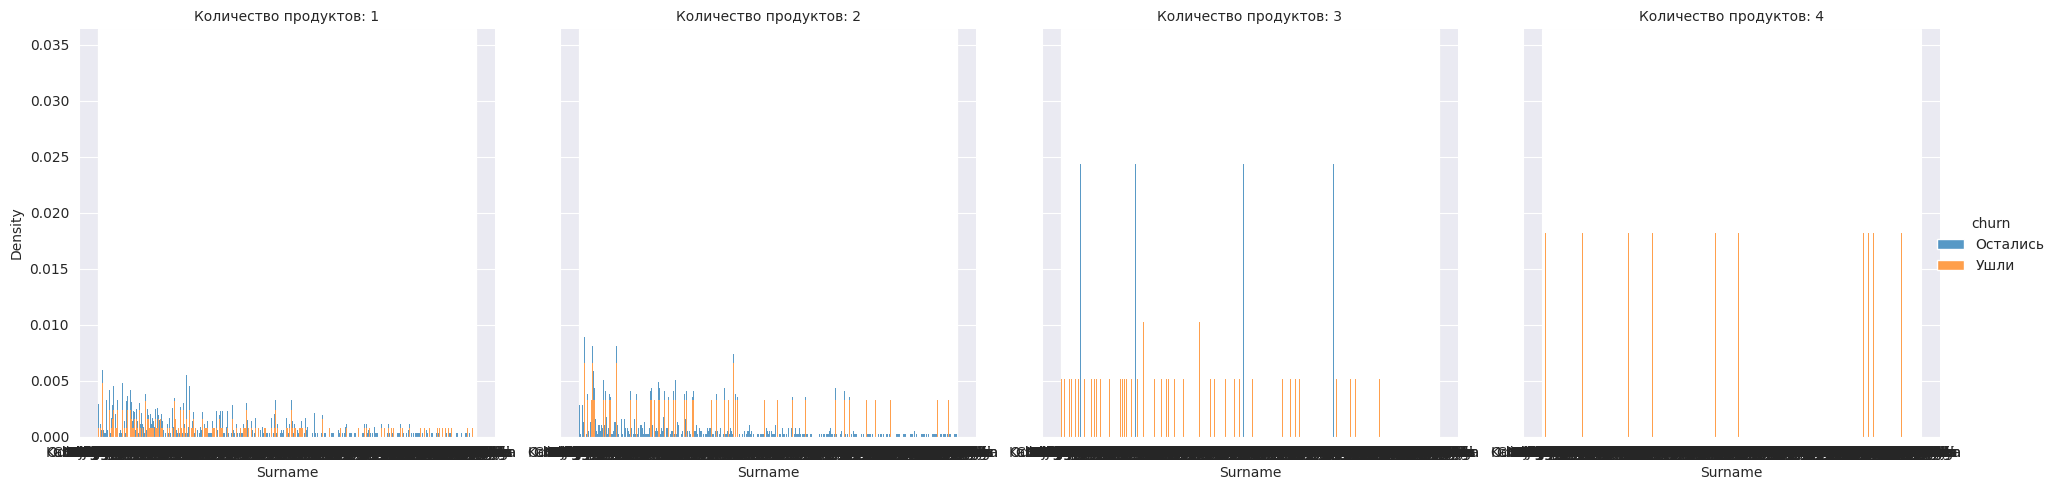

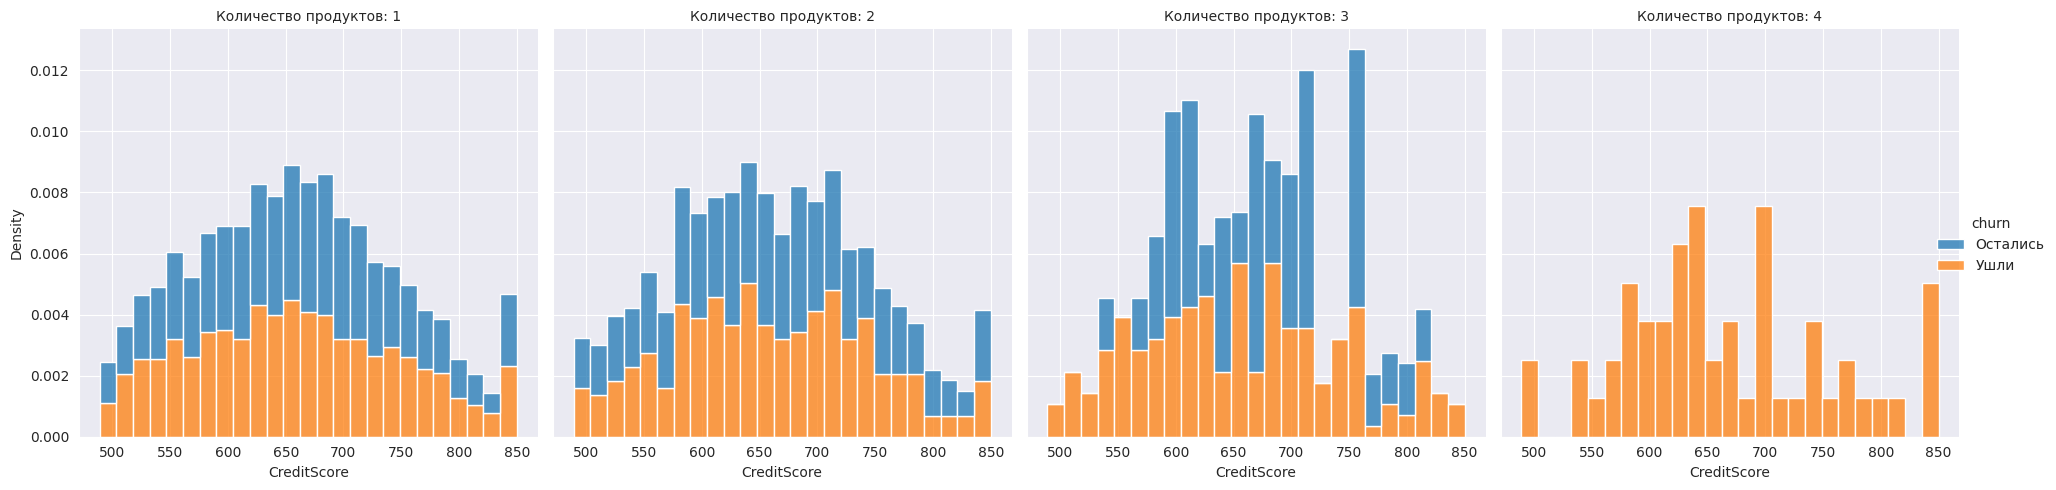

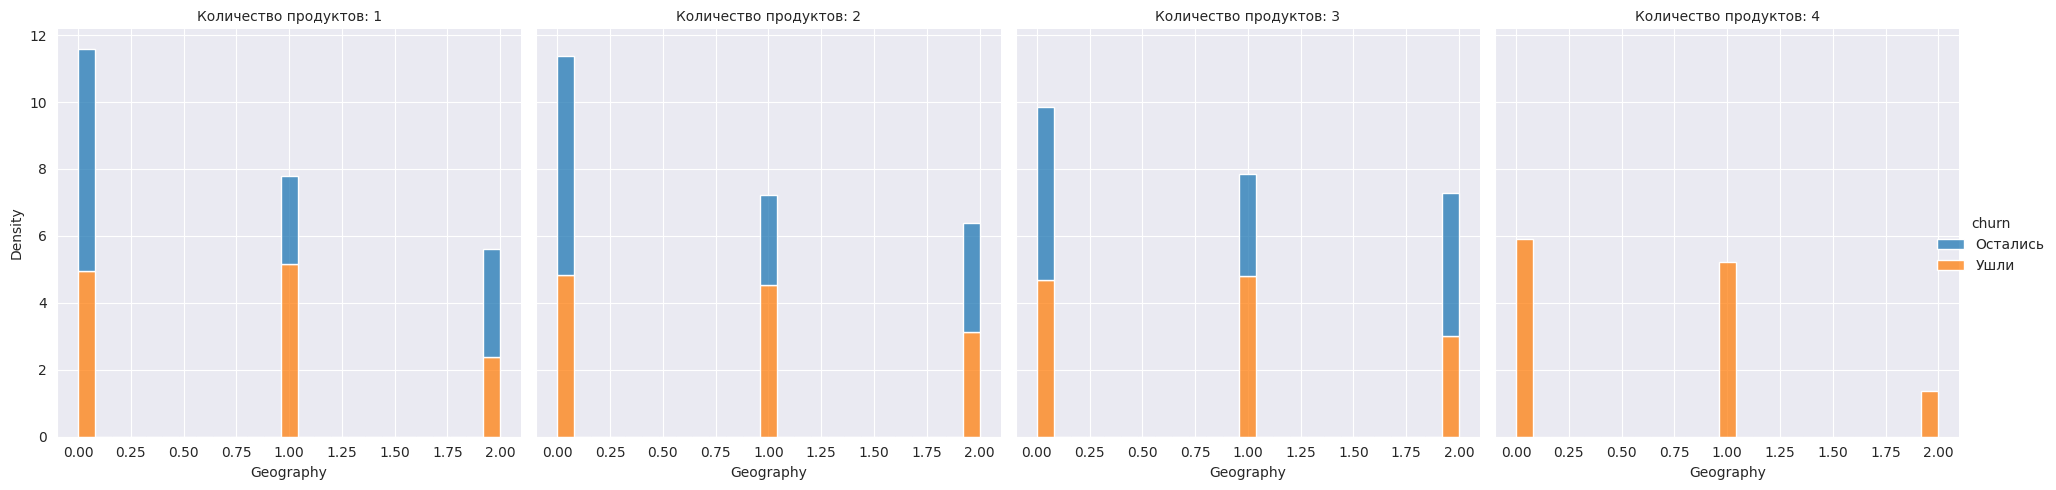

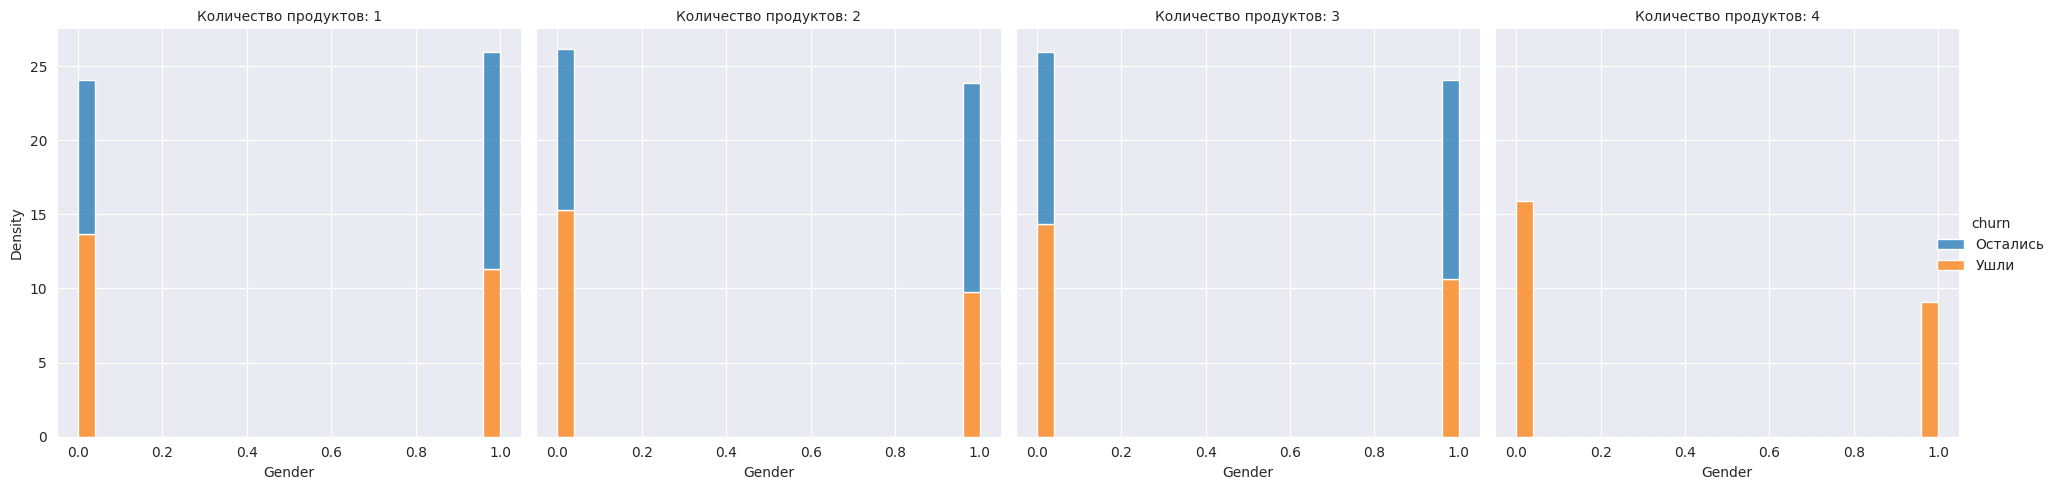

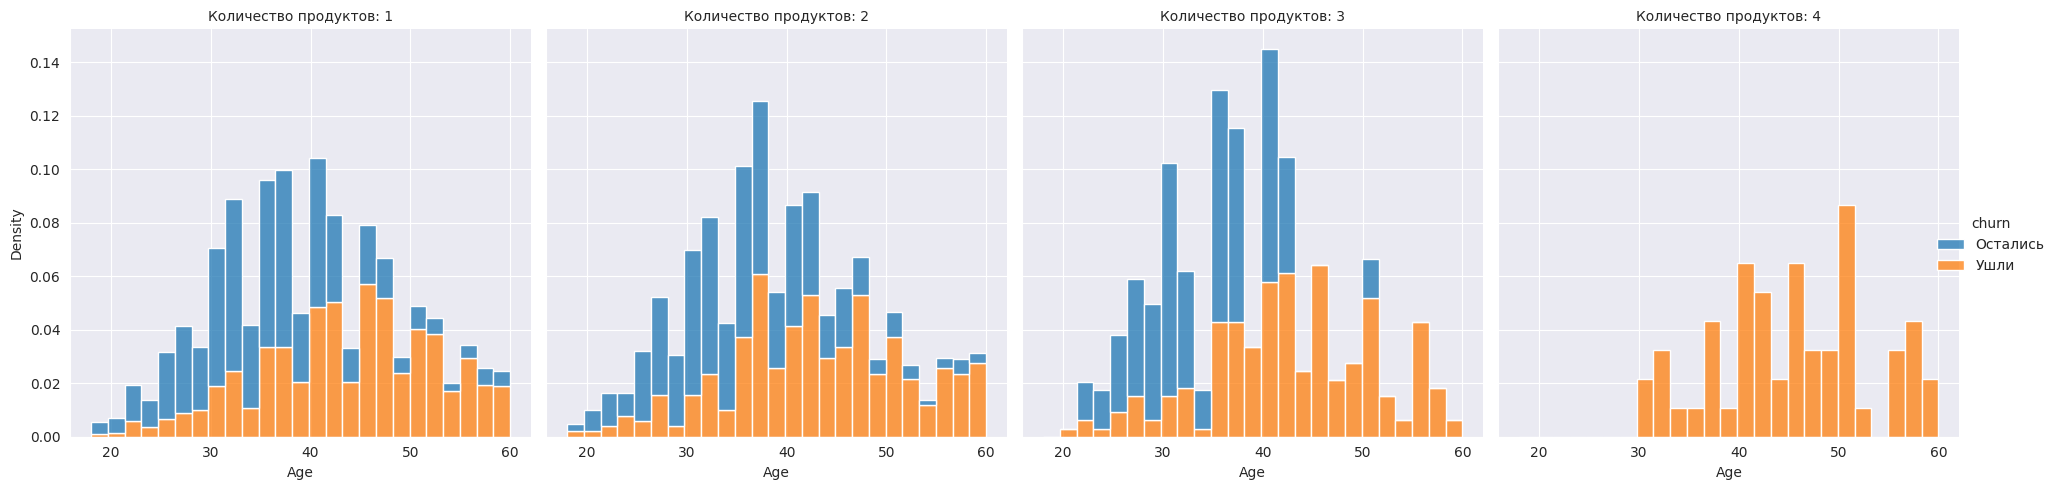

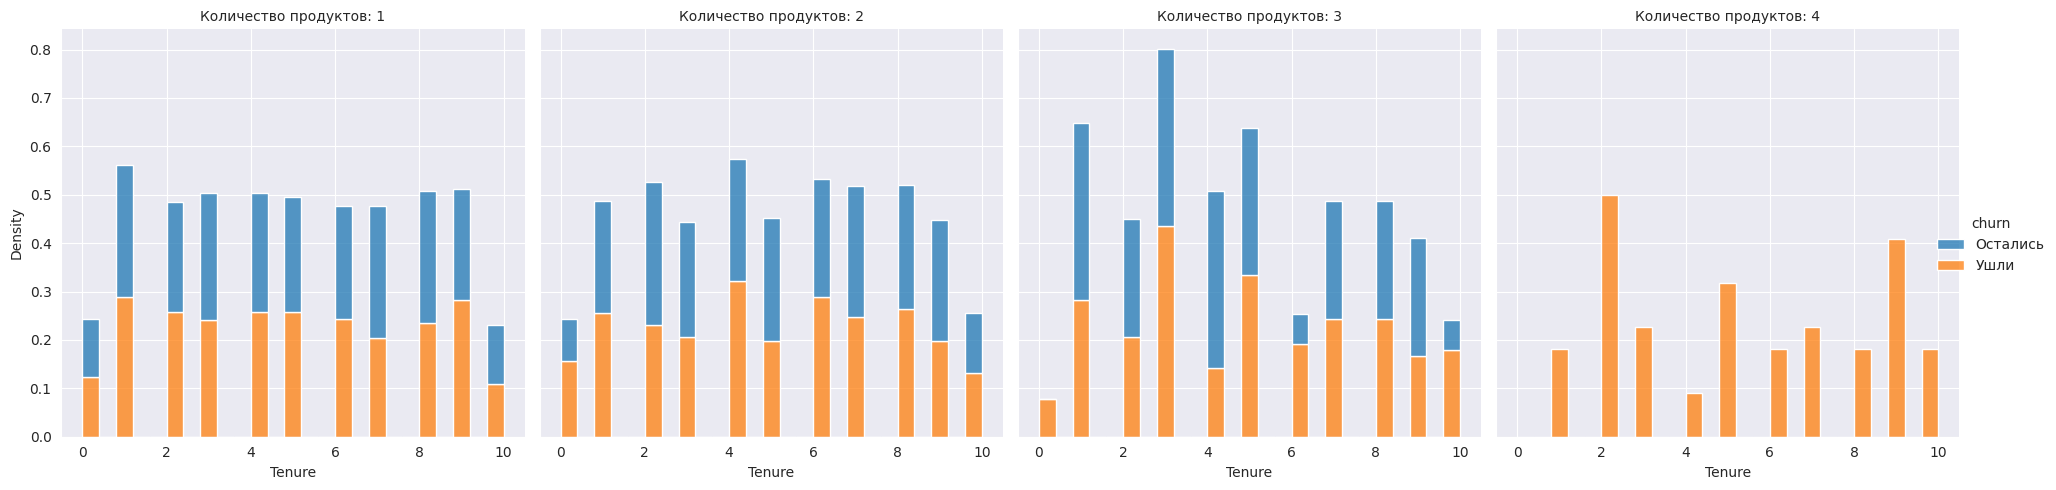

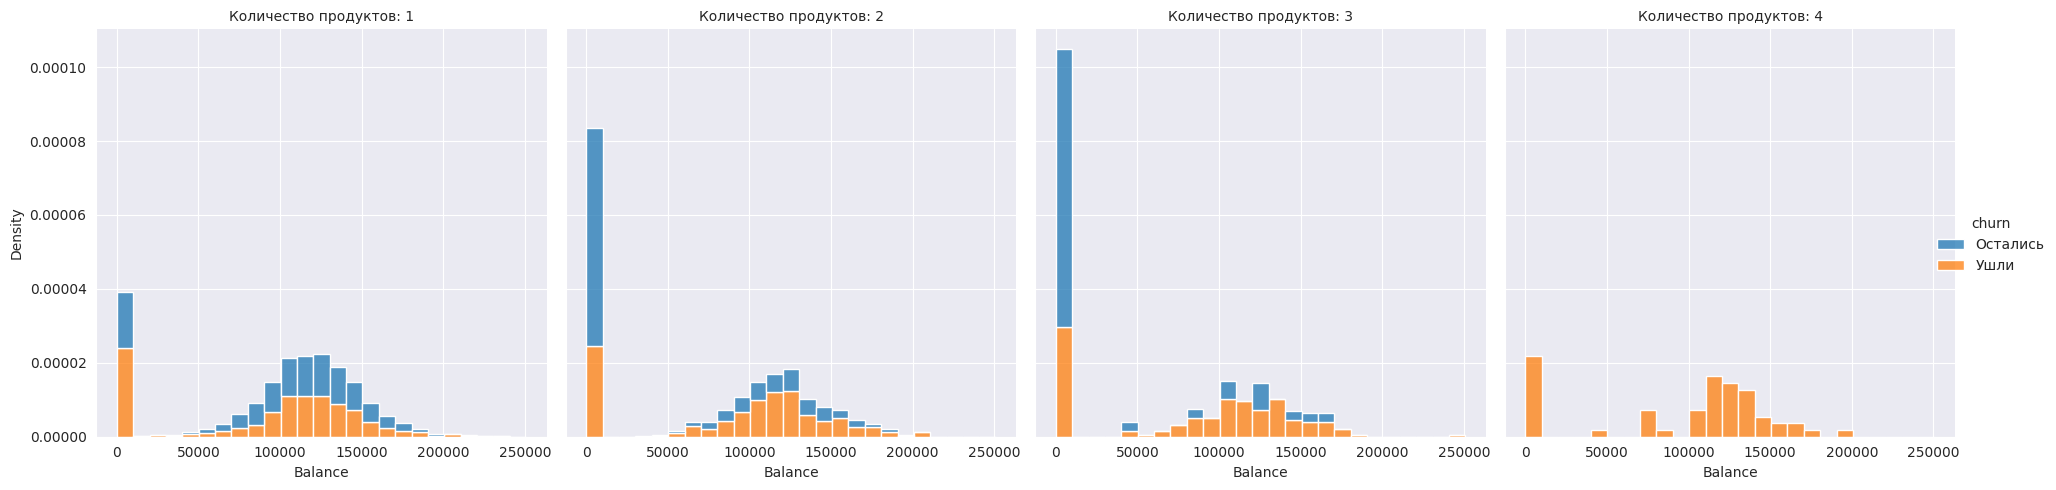

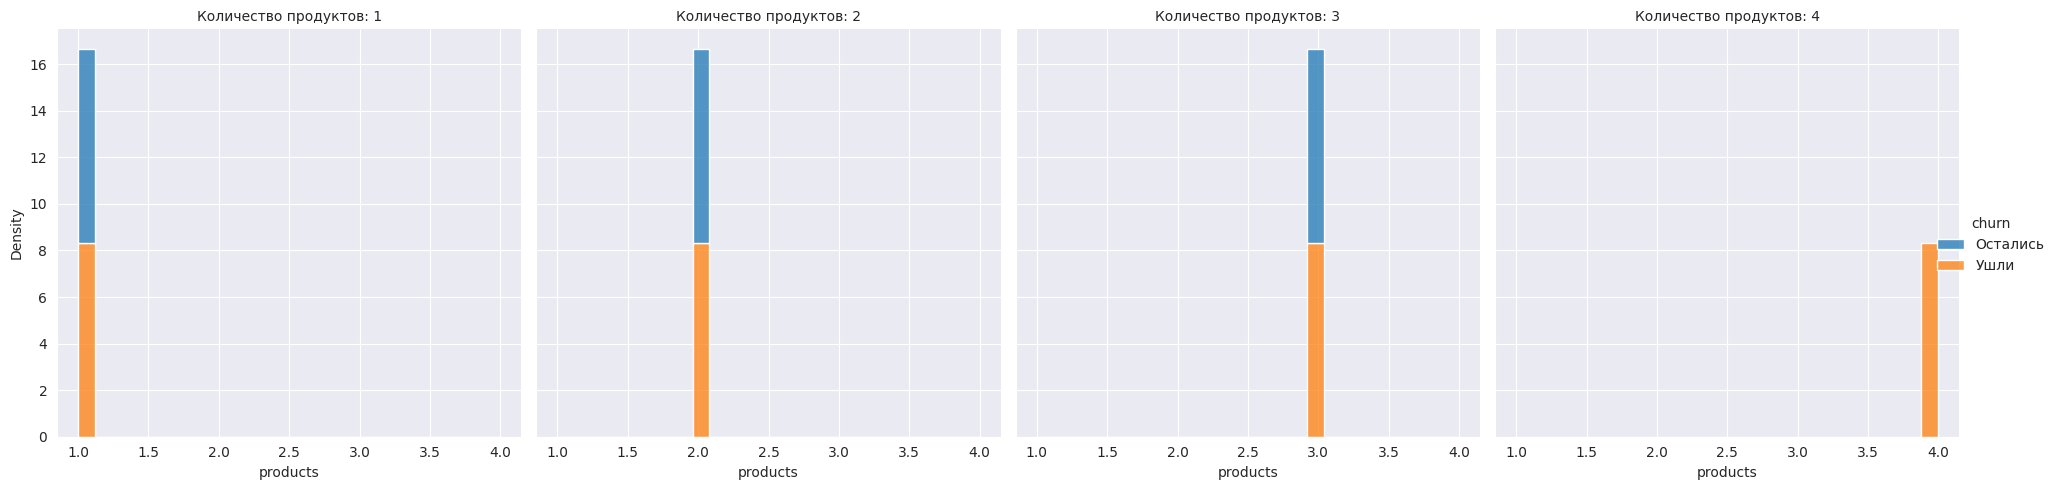

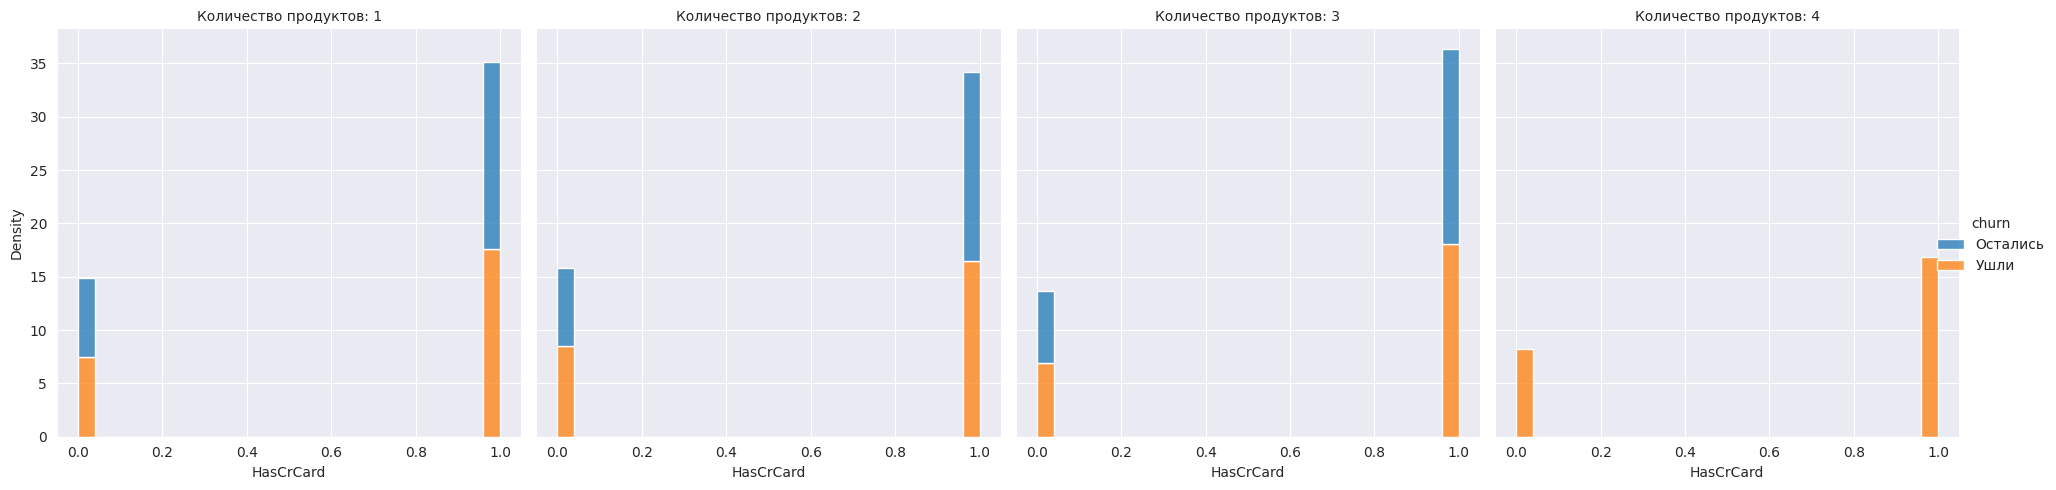

In [ ]:
#Переименуем колонки, чтобы не было ошибок
df_filtered.rename(columns={'NumOfProducts': 'products', 'Exited': 'churn'}, inplace=True)


# Создаем графики распределения
for i in df_filtered.columns[1:11]:
    g = sns.displot(data=df_filtered,
                x=i, bins=25, col='products', hue='churn', stat='density', multiple='stack', common_norm=False)
    g.set_titles("Количество продуктов: {col_name}")
    new_labels = ['Остались', 'Ушли']
    for t, label in zip(g._legend.texts, new_labels):
        t.set_text(label)

In [ ]:
# Явное преобразование типов
cols_to_convert = []

# Преобразование типов
for col in cols_to_convert:
    try:
        df_filtered[col] = pd.to_numeric(df_filtered[col])
    except ValueError:
        print(f"Не удалось преобразовать столбец '{col}' к числовому типу. Пропуск преобразования.")

# Группировка и вычисление среднего
print(df_filtered.groupby(by='products').mean(numeric_only=True)) # numeric_only=True

            RowNumber    CustomerId  CreditScore  Geography    Gender  \
products                                                                
1         4978.022702  1.568969e+07   659.944117   0.745689  0.549007   
2         5035.873239  1.569195e+07   661.413703   0.744808  0.551206   
3         4895.961864  1.569722e+07   658.415254   0.877119  0.444915   
4         5348.200000  1.567579e+07   667.218182   0.636364  0.363636   

                Age    Tenure       Balance  HasCrCard  IsActiveMember  \
products                                                                 
1         38.218948  4.966819  98580.232299   0.703340        0.492469   
2         36.429458  5.067080  51999.064455   0.703987        0.520411   
3         41.385593  4.894068  74751.920127   0.724576        0.427966   
4         45.272727  5.381818  96021.118727   0.672727        0.472727   

          EstimatedSalary     churn  Complain  Satisfaction Score  Card Type  \
products                            

Группа 1: Клиенты с одним продуктом

Описание: Потенциально консервативные клиенты, имеющие значительные средства на счете, но не использующие другие продукты банка. Возможно, они не видят ценности в других продуктах или не знают о них.
Возраст (средний): Около 40 лет.
Кредитный рейтинг (средний): Около 650.
Баланс (средний): Высокий баланс на счете.
Активность: Около половины являются активными пользователями.
Отток: Относительно высокий уровень оттока.
Жалобы: Присутствуют жалобы.
Вывод: Высокий отток требует анализа причин. Необходимо выяснить, почему эти клиенты не используют другие продукты банка и что может повысить их лояльность.

Группа 2: Клиенты с двумя продуктами

Описание: Самая лояльная группа клиентов. Активно пользуются услугами банка и удовлетворены ими.
Возраст (средний): моложе, чем в других группах (около 38 лет).
Кредитный рейтинг (средний): Около 650.
Баланс (средний): более низкий баланс на счете, чем у клиентов с 1 продуктом.
Активность: Более половины являются активными пользователями (самая высокая доля).
Отток: Самый низкий уровень оттока.
Жалобы: Наименьшее количество жалоб.
Вывод: важно поддерживать этот уровень лояльности. Необходимо продолжать предоставлять качественное обслуживание и предлагать продукты, соответствующие их потребностям.

Группа 3: Клиенты с тремя продуктами

Описание: Проблемная группа клиентов. Возможно, они используют неподходящий набор продуктов или испытывают проблемы с обслуживанием.
Возраст (средний): старше, чем в других группах (около 43 лет).
Кредитный рейтинг (средний): Около 650.
Баланс (средний): Средний баланс.
Активность: Меньше половины являются активными пользователями.
Отток: Очень высокий уровень оттока.
Жалобы: Очень высокий уровень жалоб.
Вывод: Необходимо срочно выяснить причины высокого оттока клиентов и жалоб. Возможно, требуется пересмотреть ассортимент продукции или улучшить качество обслуживания.

Группа 4: Клиенты с четырьмя продуктами

Описание: Крайне проблемная группа клиентов. Вероятно, их потребности не удовлетворяются или они столкнулись с серьезными проблемами.
Возраст (средний): Самые старшие (около 46 лет).
Кредитный рейтинг (средний): Около 650.
Баланс (средний): Высокий баланс на счете.
Активность: Около половины являются активными пользователями.
Отток: Уходят все клиенты.
Жалобы: Практически все жалуются.
Вывод: Требуется немедленное вмешательство и поиск индивидуальных решений. Необходимо провести детальный анализ причин оттока и предложить персонализированные решения для каждого клиента.

Постановка гипотез:

Выдвигаем гипотезу для исследования:

Гипотеза (о возрасте): существует разница в возрасте между клиентами, использующими два продукта банка, и клиентами, использующими только один продукт.

Методология проверки гипотез:
Проверка статистической значимости различий между группами требует чёткого формулирования нулевой и альтернативной гипотез, а также определения уровня значимости (альфа).

В этом анализе мы устанавливаем уровень значимости равным 5% (альфа = 0,05). Это означает, что мы готовы допустить 5% вероятность ошибочного отклонения нулевой гипотезы (ошибка первого рода).

Решение о гипотезе: если минимальный уровень значимости (p-значение), полученный в результате статистического теста, окажется меньше 5%, мы отвергаем нулевую гипотезу в пользу альтернативной. В противном случае у нас не будет достаточных оснований для отклонения нулевой гипотезы.
Проверка гипотезы №1 (о возрасте):

Нулевая гипотеза (H0): возраст клиентов, использующих два продукта банка, равен среднему возрасту клиентов, использующих один продукт.

Альтернативная гипотеза (H1): возраст клиентов, использующих два продукта банка, не равен среднему возрасту клиентов, использующих один продукт.

In [ ]:
# Разделение данных на группы
group1 = df_filtered[df_filtered['products'] == 1]['Age']
group2 = df_filtered[df_filtered['products'] == 2]['Age']

# Проверка размера групп
min_group_size = 30  # Минимальный размер группы для надежных результатов
if len(group1) < min_group_size or len(group2) < min_group_size:
    print(
        f"Предупреждение: одна из групп имеет размер меньше {min_group_size}. Результаты могут быть ненадежными.")

# Выравнивание размеров выборок
n1 = len(group1)
n2 = len(group2)
if n1 != n2:
    min_size = min(n1, n2)
    group1 = group1.sample(min_size, random_state=42)  # random_state для воспроизводимости
    group2 = group2.sample(min_size, random_state=42)
    print(f"\nРазмеры выборок выровнены до {min_size}.")


Размеры выборок выровнены до 4189.


In [ ]:
# Проверка на нормальность
alpha = 0.05
shapiro_group1 = stats.shapiro(group1)
shapiro_group2 = stats.shapiro(group2)

print(f'Тест Шапиро-Уилка для группы 1: {shapiro_group1}')
print(f'Тест Шапиро-Уилка для группы 2: {shapiro_group2}')

Тест Шапиро-Уилка для группы 1: ShapiroResult(statistic=np.float64(0.9852784967411545), pvalue=np.float64(1.702092926754553e-20))
Тест Шапиро-Уилка для группы 2: ShapiroResult(statistic=np.float64(0.9829608326997523), pvalue=np.float64(4.539493234913634e-22))


Для проверки уровня статистической значимости будем применять непараметрический тест, такой как критерий Манна-Уитни (Mann-Whitney U test). Этот тест не требует предположения о нормальном распределении данных.
Хотя бы одна группа не имеет нормальное распределение.Используем Mann-Whitney U тест

In [ ]:
# Тест Манна-Уитни
mann_whitney = stats.mannwhitneyu(group1, group2)

# Интерпретация результатов
alpha = 0.05  # Уровень значимости
if mann_whitney.pvalue < alpha:
    print("\nОтвергаем нулевую гипотезу. Существует статистически значимое различие в возрасте между клиентами, использующими 1 и 2 продукта .")
else:
    print("\nНе получилось отвергнуть нулевую гипотезу. Нет статистически значимого различия в возрасте между клиентами, использующими 1 и 2 продукта.")


Отвергаем нулевую гипотезу. Существует статистически значимое различие в возрасте между клиентами, использующими 1 и 2 продукта .


Рассмотрим, как распределены держатели кредитных карт среди клиентов, оставшихся в банке, и клиентов, ушедших из банка (отток).

In [ ]:
# Группировка по оттоку
churn_group = df_filtered.groupby('churn')

# Расчет количества держателей кредитных карт в каждой группе
successes = churn_group['HasCrCard'].sum()
nobs = churn_group['HasCrCard'].count()

print("Держателей карт по группам (churn):\n", successes)
print("\nОбщее количество клиентов по группам (churn):\n", nobs)

# Расчет долей
proportions = successes / nobs
print("\nДоля держателей кредитных карт по группам (Exited):\n", proportions)

Держателей карт по группам (churn):
 churn
0    5120
1    1259
Name: HasCrCard, dtype: int64

Общее количество клиентов по группам (churn):
 churn
0    7254
1    1807
Name: HasCrCard, dtype: int64

Доля держателей кредитных карт по группам (Exited):
 churn
0    0.705817
1    0.696735
Name: HasCrCard, dtype: float64


Анализ доли держателей кредитных карт:

  Среди оставшихся клиентов (Exited = 0), доля держателей кредитных карт составляет 0.706
  
  Среди ушедших клиентов (Exited = 1), доля держателей кредитных карт составляет 0.697

На основе проведенного анализа можно сказать, что доля держателей кредитных карт практически одинакова в обеих группах (оставшихся и ушедших клиентах).

Выводы:

Возраст и количество продуктов как фактор оттока: существует прямая зависимость между возрастом, количеством продуктов и оттоком. Клиенты с наибольшим средним возрастом, использующие четыре продукта, демонстрируют наибольшую склонность к оттоку. Это тревожный сигнал, указывающий на потенциальные проблемы с удержанием наиболее ценных (по количеству используемых продуктов) клиентов старшего возраста.
Критическая точка — 2 продукта: наблюдается резкий рост оттока клиентов после приобретения двух продуктов. Это говорит о том, что у банка есть «зона риска», когда клиенты становятся более восприимчивыми к предложениям конкурентов или сталкиваются с какими-то проблемами при использовании трех и более продуктов.

Рекомендации:
Удержание клиентов с одним продуктом:
Активно предлагать клиентам, купившим один продукт, дополнительные продукты, но делать это осторожно и персонализировано. Предложения должны соответствовать потребностям клиента и подчеркивать преимущества использования нескольких продуктов в комплексе.
Разработать “приветственные” бонусы за подключение второго продукта.
Предотвращение оттока после двух продуктов:
Избегайте агрессивных продаж третьего продукта. Вместо этого сосредоточьтесь на укреплении отношений с клиентом и обеспечении отличного сервиса по уже используемым продуктам.
Ввести более лояльные условия (сниженные комиссии, повышенные бонусы) для новых продуктов для клиентов, которые уже используют два продукта. Это может облегчить переход к большему количеству продуктов и повысить лояльность.
Тщательно анализировать причины, по которым клиенты отказываются от третьего продукта, и устранять эти проблемы.
Удержание клиентов с тремя продуктами:
Аналогично пункту 2, избегать агрессивного предложения четвертого продукта.
Усилить программы лояльности и персональные предложения для этой группы клиентов.
Причины оттока клиентов с четырьмя продуктами:
Приоритетная задача: провести качественное исследование (опрос, интервью) с клиентами, которые ушли после использования четырех продуктов. Необходимо выяснить конкретные причины их ухода: сложность использования большого количества продуктов, неконкурентные условия, плохое обслуживание, изменение потребностей и т. д.
На основе результатов исследования разработать индивидуальные стратегии удержания для этой группы клиентов (например, персональный менеджер, специальные предложения).